<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/9_2_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

교재 3.6장 (p116) 참고


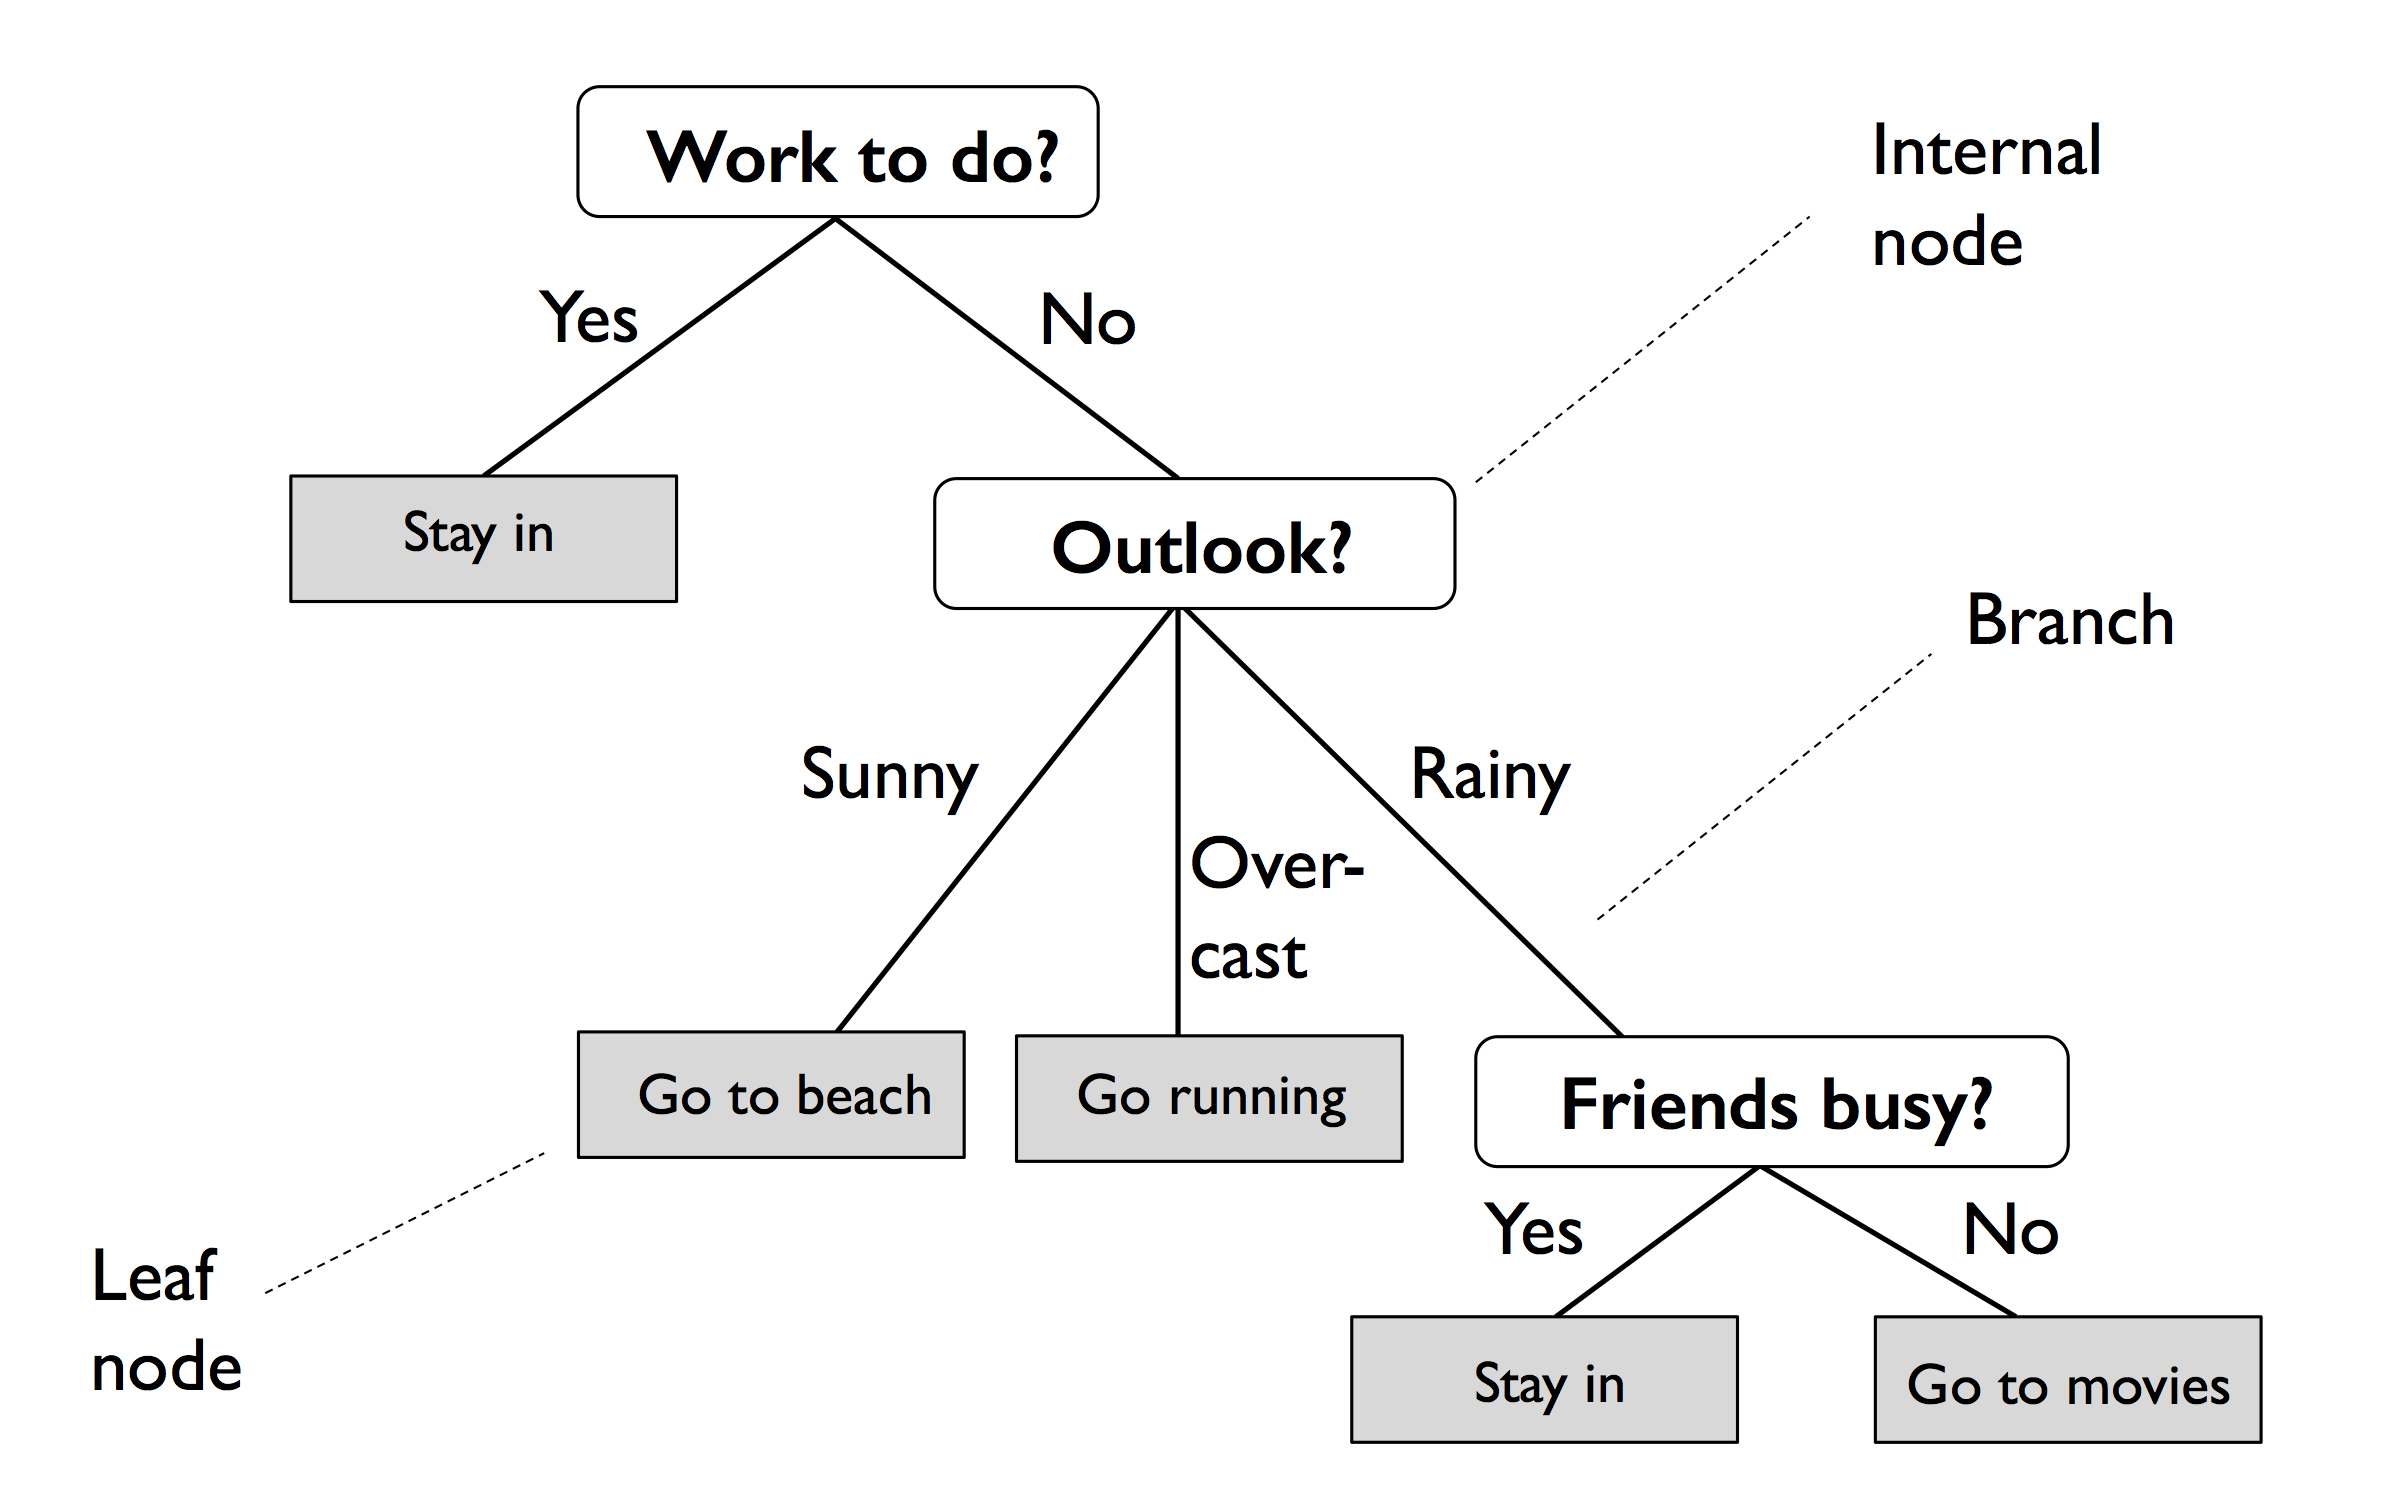

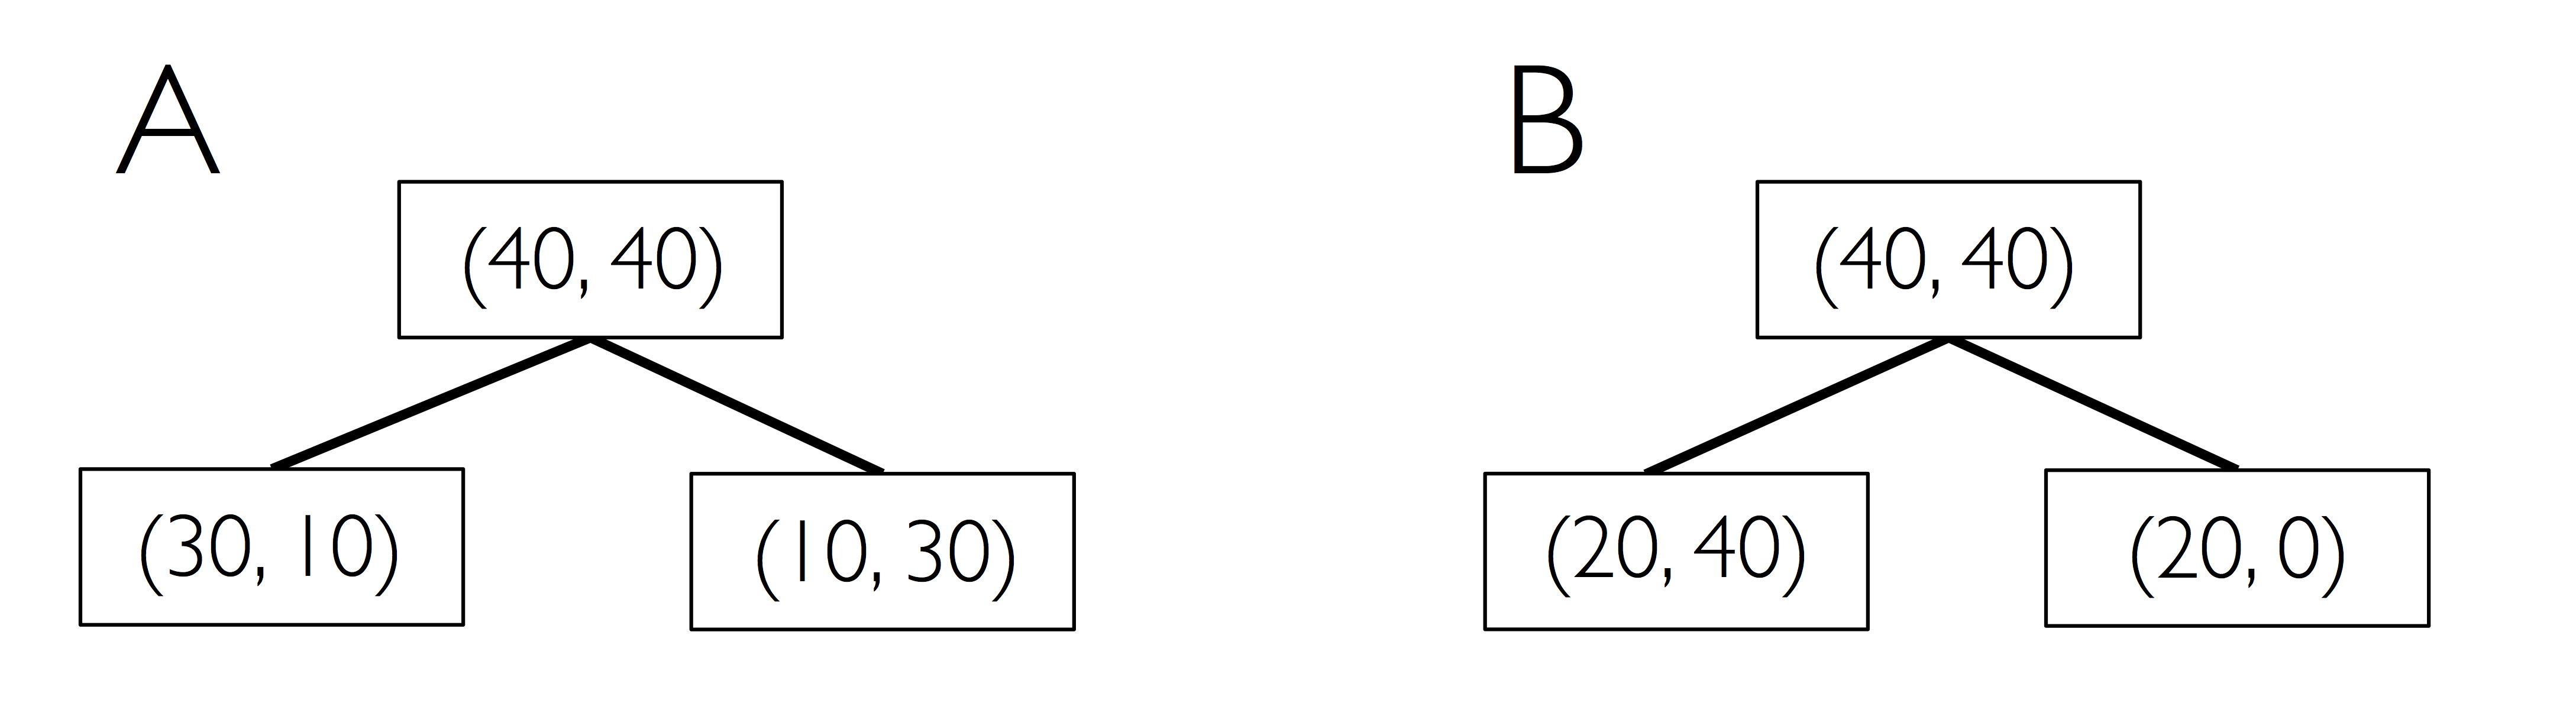

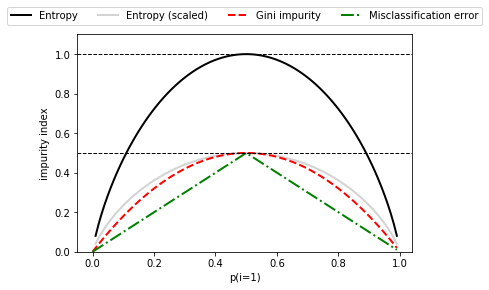

In [ ]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')

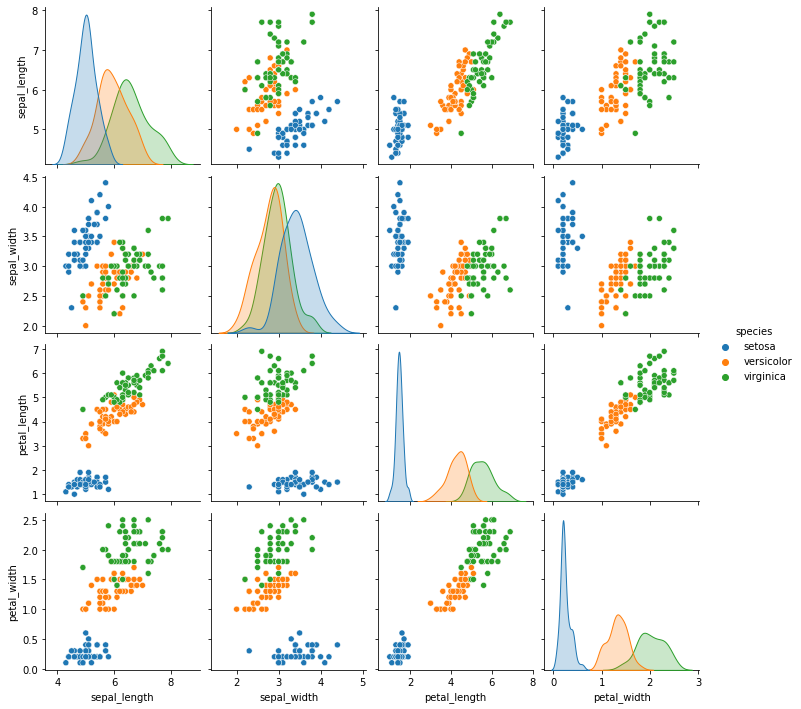

In [ ]:
sns.pairplot(iris, hue='species')

In [ ]:
# 모델을 feature와 lebel로 나눔
X=iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y=iris['species']  # Labels

In [ ]:
# 데이터를 train, test set으로 나눔
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

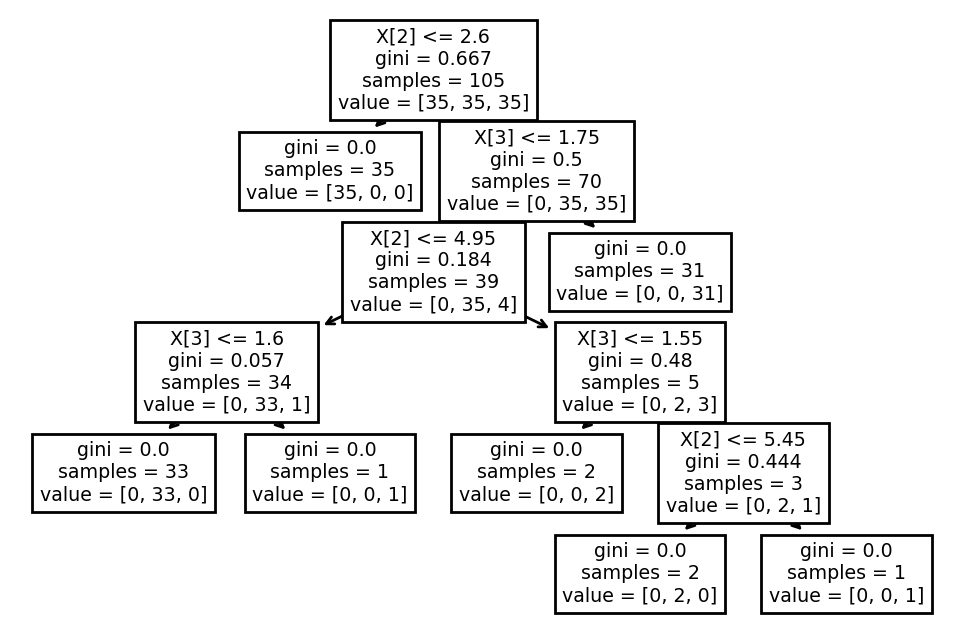

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi=200)
tree.plot_tree(clf)
plt.show()

In [ ]:
dot_data = tree.export_graphviz(clf)

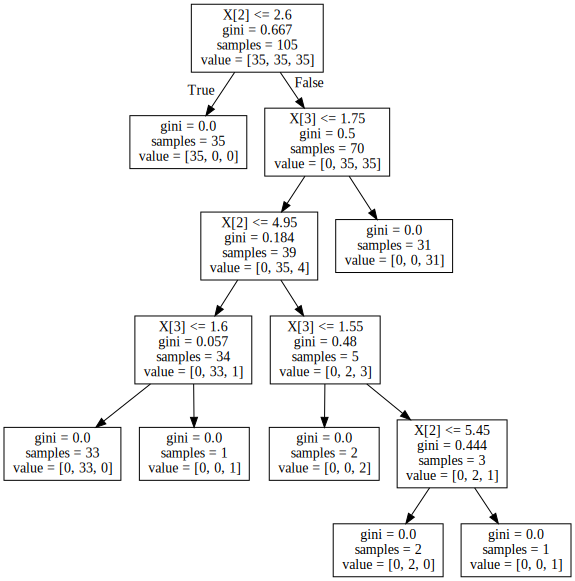

In [ ]:
import graphviz
graph = graphviz.Source(dot_data)  
graph

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
ord_enc = OrdinalEncoder(dtype=np.int)

In [ ]:
ord_enc.fit(iris[['species']]) 

OrdinalEncoder(categories='auto', dtype=<class 'int'>)

In [ ]:
iris['species_code'] = ord_enc.transform(iris[['species']])

In [ ]:
ord_enc.inverse_transform(iris[['species_code']])

array([['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['versicolor'],
       ['versicolor'],
    

In [ ]:
X=iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y=iris['species_code']  # Labels

In [ ]:
# 데이터를 train, test set으로 나눔
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
ord_enc.categories_[0]

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
dot_data = tree.export_graphviz(clf, class_names=ord_enc.categories_[0], feature_names=X_train.columns)

In [ ]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
115,6.4,3.2,5.3,2.3
62,6.0,2.2,4.0,1.0
92,5.8,2.6,4.0,1.2
102,7.1,3.0,5.9,2.1
55,5.7,2.8,4.5,1.3
...,...,...,...,...
10,5.4,3.7,1.5,0.2
137,6.4,3.1,5.5,1.8
2,4.7,3.2,1.3,0.2
108,6.7,2.5,5.8,1.8


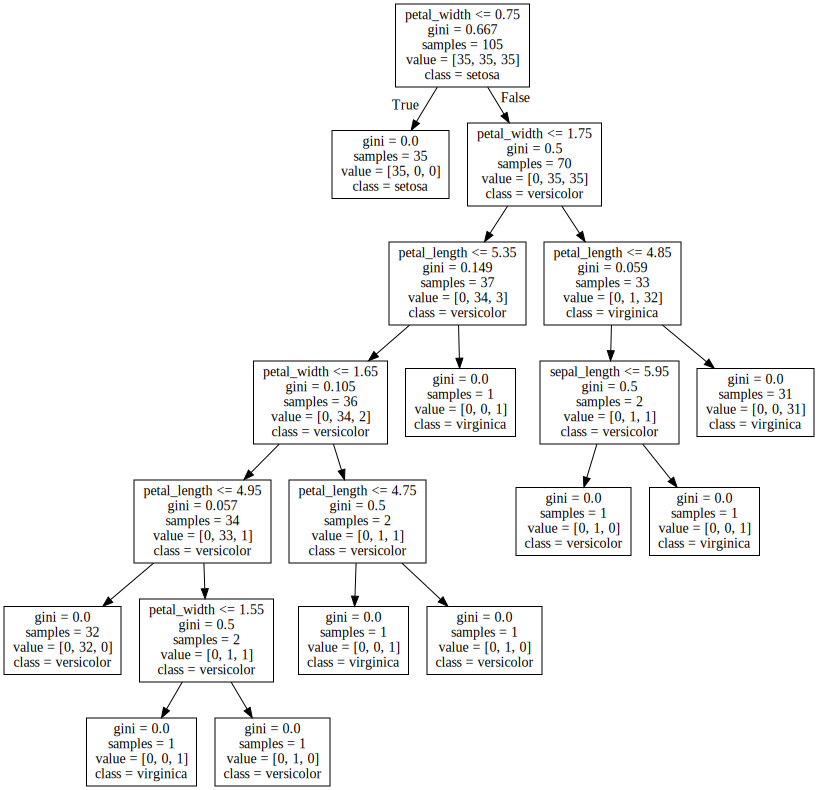

In [ ]:
import graphviz
graph = graphviz.Source(dot_data)  
graph

In [ ]:
clf.predict(X_test)

array(['setosa', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa'],
      dtype=object)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, normalize='true')

array([[1.        , 0.        , 0.        ],
       [0.        , 0.93333333, 0.06666667],
       [0.        , 0.        , 1.        ]])

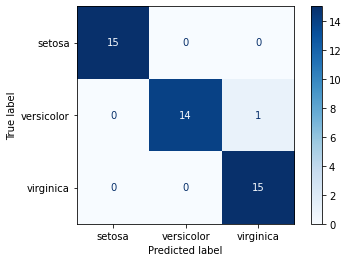

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=ord_enc.categories_[0],
                                 cmap=plt.cm.Blues,
                                 normalize=None)